In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import linregress
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib.patches as mpatches
from matplotlib.ticker import MultipleLocator
from matplotlib.cm import ScalarMappable
from matplotlib.colors import ListedColormap
from matplotlib.colors import BoundaryNorm
from matplotlib.colorbar import ColorbarBase
import matplotlib.colors as mcolors
from matplotlib.ticker import ScalarFormatter
import matplotlib as mpl

### FIG 01 a

In [2]:
dt_population = pd.read_csv('DB_population.csv', delimiter=';')
#La población de 1615 se asume porque la fundación de medellín fue en 1616

In [3]:
dt_population.head()

,year,population
0,1615,0
1,1825,6050
2,1835,8382
3,1843,9118
4,1851,13755


In [4]:
dt_area = pd.read_csv('DB_area.txt', delimiter=',')

In [5]:
dt_area

,year,period,area(km2),cumulative_area
0,1770,1770,0.179194,0.179194
1,1800,1771-1800,0.146163,0.325357
2,1847,1801-1847,0.360282,0.685639
3,1889,1848-1889,1.217413,1.903052
4,1908,1890-1908,1.979367,3.882419
5,1913,1909-1913,0.142011,4.024430
6,1931,1914-1931,4.986584,9.011014
7,1940,1932-1940,8.088156,17.099170
8,1956,1941-1956,11.379334,28.478504
9,1958,1957-1958,1.371279,29.849783


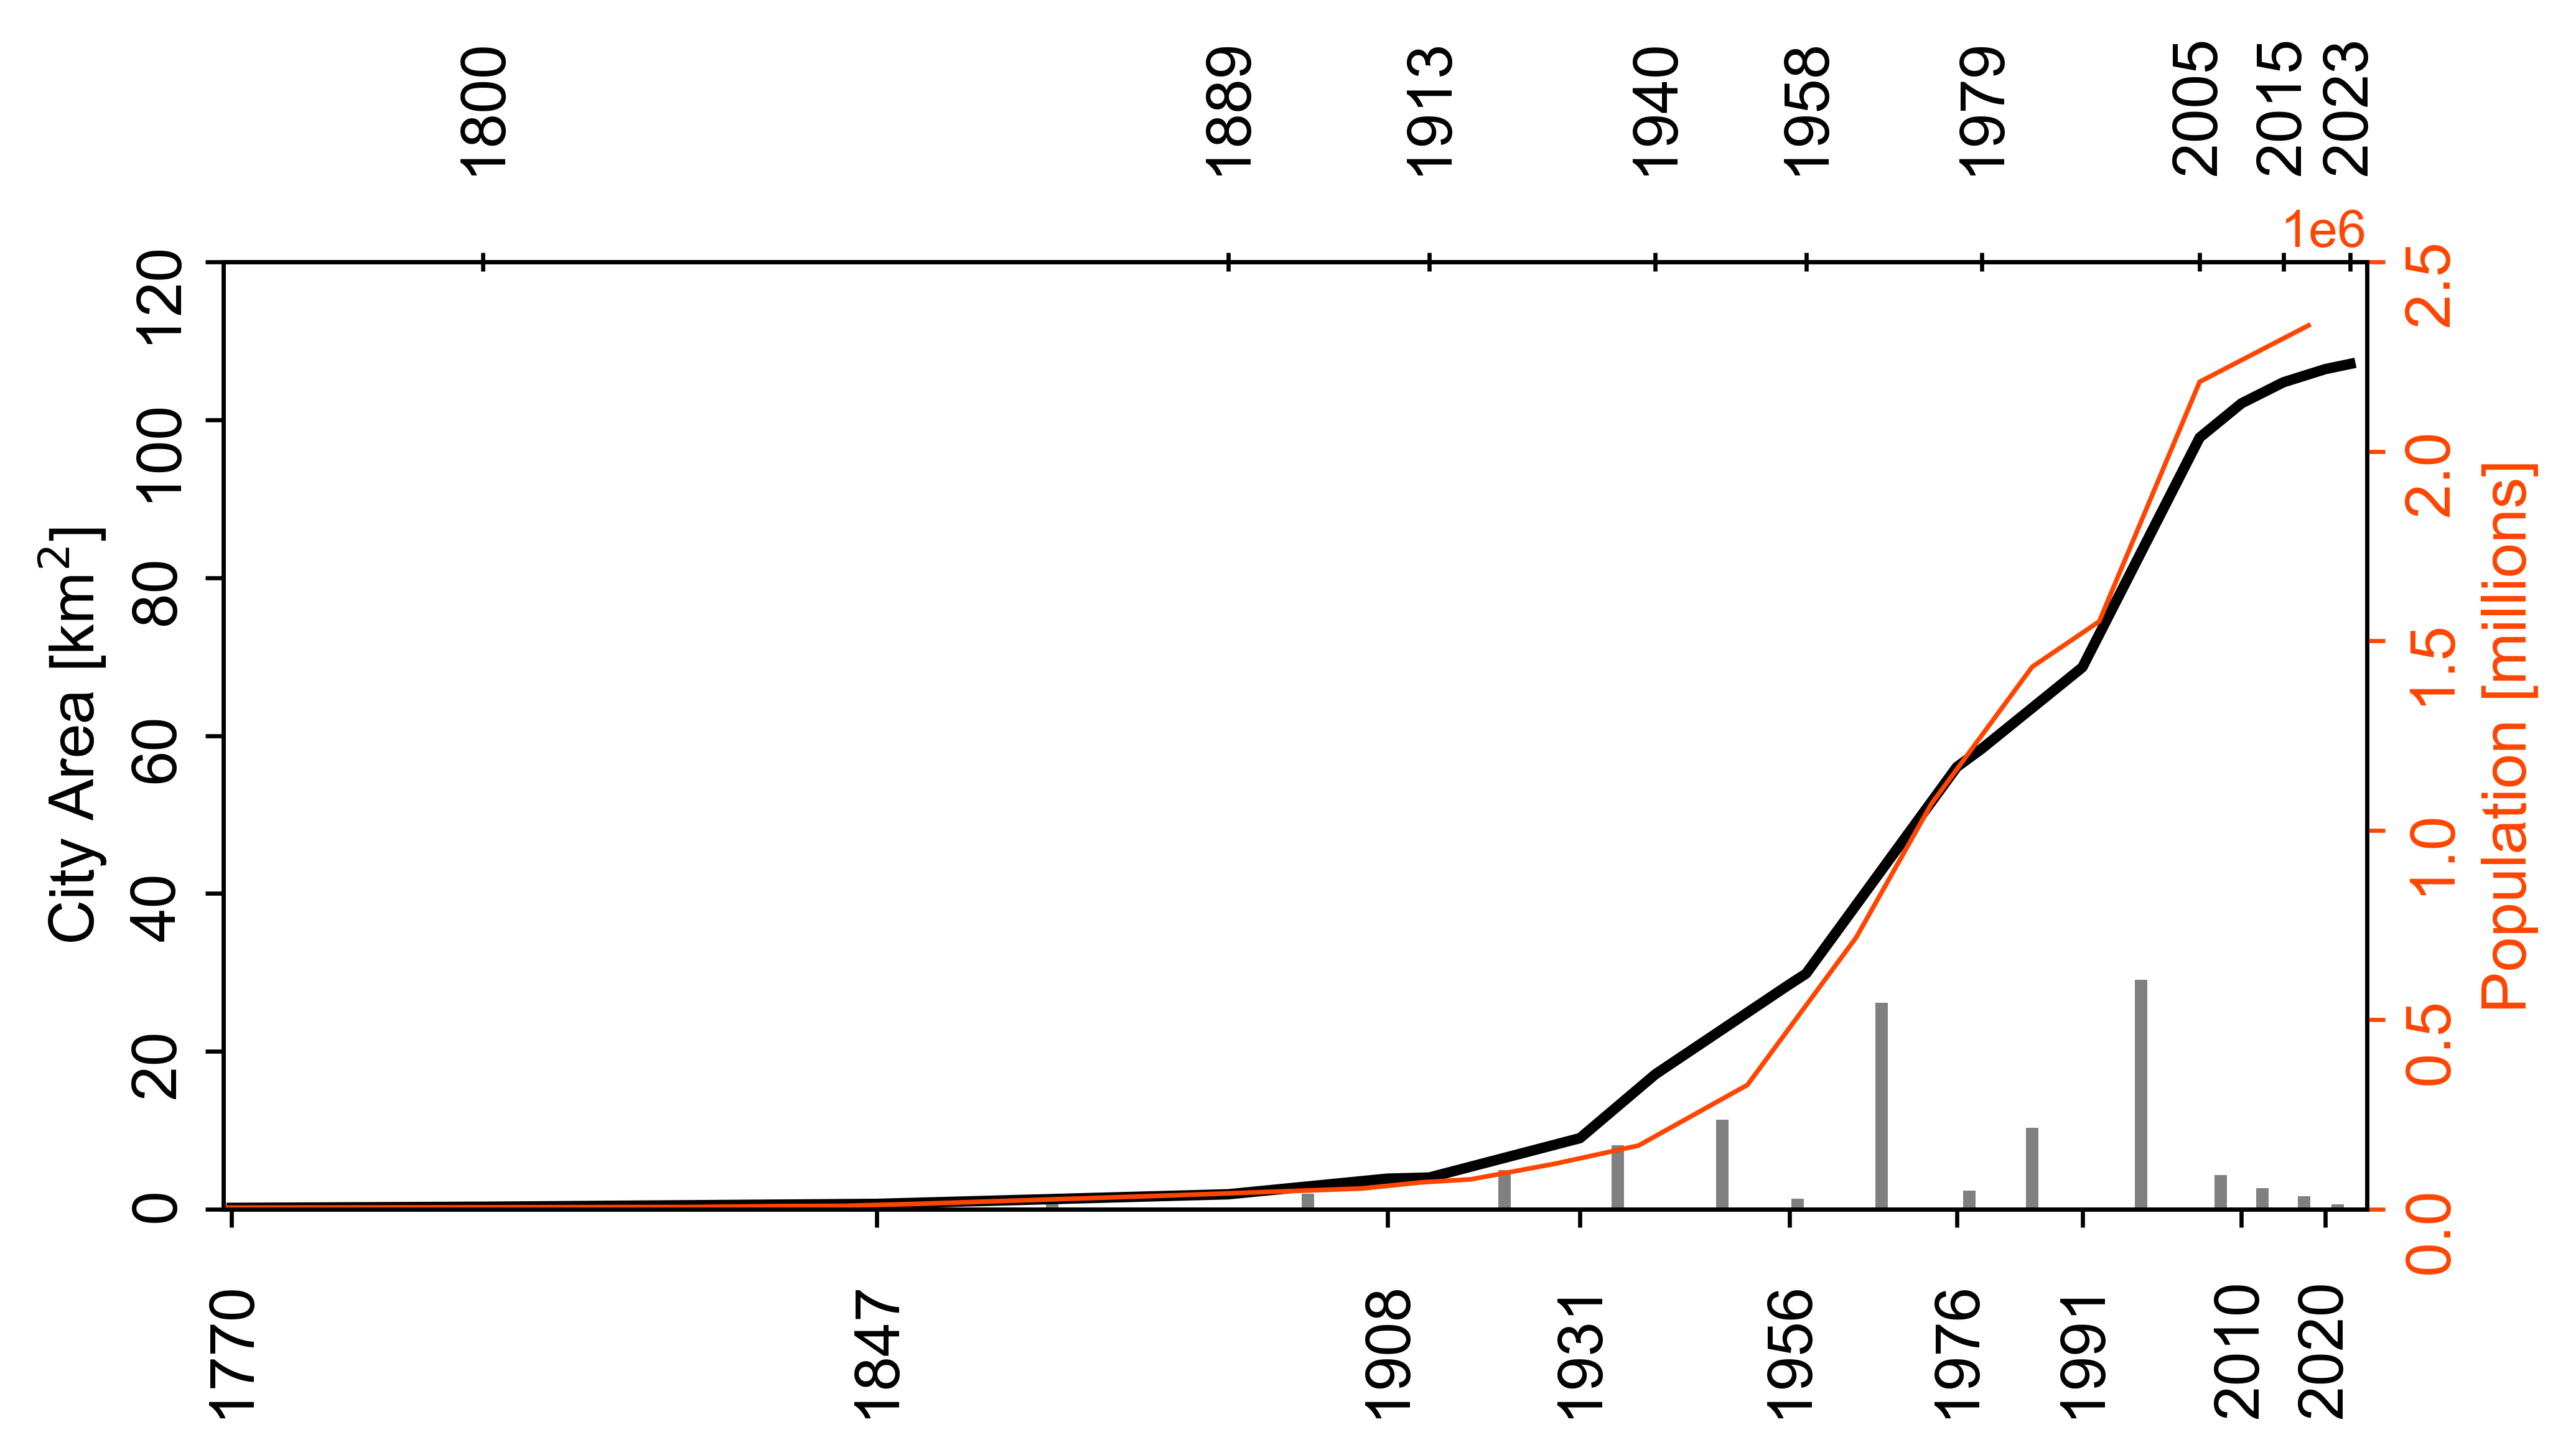

In [130]:
# TOTAL AND PARCIAL GROWTH OF MEDELLIN
# NOT LOG Y AXIS!

#plt.figure(figsize=(6, 3), dpi=600)
fig, ax = plt.subplots(figsize=(7, 4), dpi=600)
years_mid = [1750, 1785, 1823.5, 1868, 1898.5, 1910.5, 1922, 1935.5, 1948, 1957, 1967, 1977.5, 1985, 1998, 2007.5, 2012.5, 2017.5, 2021.5]
years = [1770, 1800, 1847, 1889, 1908, 1913, 1931, 1940, 1956, 1958, 1976, 1979, 1991, 2005, 2010, 2015, 2020, 2023]
years_one= [1770, 1847, 1908,1931, 1956,1976, 1991, 2010, 2020]
years_two= [1800, 1889, 1913, 1940, 1958, 1979, 2005, 2015, 2023]

bars = plt.bar(years_mid, dt_area['area(km2)'], 
               width=1.5, 
               color='gray',
               label='Growth of each period')
line = plt.plot(years, dt_area['cumulative_area'],
                linewidth=2,
                color='k',
                label='Total growth of the city')
#plt.legend(fontsize=8)
plt.xticks(years_one, years_one, rotation=90, size=12)
ax.xaxis.set_tick_params(pad=10)
plt.yticks(np.arange(0, 121, 20), np.arange(0, 121, 20), rotation=90, size=12, fontname="Arial")
plt.xlim(1769,2025)
plt.ylabel('City Area [km$^2$]', size=12, fontname="Arial")

# Add the second x-axis
secax = ax.secondary_xaxis('top')  
secax.set_xticks(years_two)           
secax.set_xticklabels(years_two, rotation=90, size=12) 
secax.xaxis.set_tick_params(pad=15, direction='inout') 

# Create secondary y-axis for the line
color2 = 'orangered'
ax2 = plt.twinx()
ax2.spines['right'].set_color('k')
line = ax2.plot(dt_population['year'], dt_population['population'], linewidth=0.9, color=color2, label='Population growth')
ax2.tick_params(axis='both',
                which='both', 
                labelsize=12,
                rotation=90,
                color=color2,
                labelcolor=color2,
                labelfontfamily="Arial")
ax2.set_ylabel('Population [millions]', size=12, color=color2, fontname="Arial")
ax2.set_ylim(0, 2.5e6)


plt.tight_layout()
# plt.savefig('fig01b_FV.pdf')
plt.show()

### FIG 2a

In [7]:
area_palette = ["lightyellow", "#D9F0B2", "#70DAC8", "#06AEAA", "#197C9B", "#0F3C73"]  
custom_cmap = ListedColormap(area_palette)

In [8]:
years = [1770, 1800, 1847, 1889, 1908, 1913, 1931, 1940, 1956, 1958, 1976, 1979, 1991, 2005, 2010, 2015, 2020, 2023]
period_handles = ['<1770', '1771-1800', '1801-1847', '1848-1889', '1890-1908', '1909-1913', '1914-1931', '1932-1940', '1941-1956', '1957-1958', '1959-1976', '1977-1979', '1980-1991', '1992-2005', '2006-2010', '2011-2015', '2016-2020', '2021-2023']

In [9]:
columns_of_interest = ['MEAN', 'YEAR', 'STD']
dt_slope = pd.read_csv('DB_slope.txt', delimiter=',', usecols=columns_of_interest)
dt_slope.columns = ['slope', 'slope_std', 'year']

In [10]:
dt_area['area(km2)']

0      0.179194
1      0.146163
2      0.360282
3      1.217413
4      1.979367
5      0.142011
6      4.986584
7      8.088156
8     11.379334
9      1.371279
10    26.169622
11     2.340059
12    10.296515
13    29.098145
14     4.338324
15     2.663966
16     1.668110
17     0.663331
Name: area(km2), dtype: float64

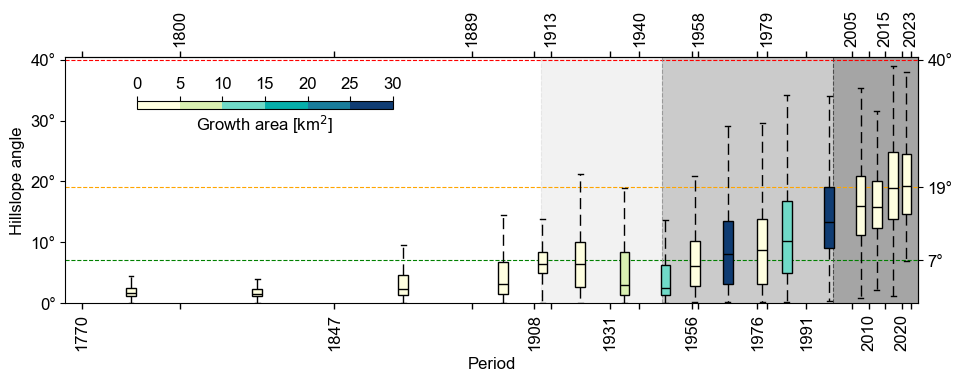

In [153]:
### Slope vs period

fig, ax = plt.subplots(figsize=(11, 4))


## Slope thresholds
slope_cuts =  [7, 19, 40]
colors = ['green', 'orange', 'red']
slope_categories=['0-7: Slightly inclined', '7-11: Inclined', '11-19: Very inclined', '19-40: Abrupt', '40-90: Steep']

for i, (y_value, color, slope_cat) in enumerate(zip(slope_cuts, colors, slope_categories)):
    ax.axhline(y_value, color=color, linestyle='--', linewidth=0.8)

## Years thresholds
year_cuts = [1910, 1947, 1999]
year_intervals = [37, 52, 55]
year_colors = cm.binary(np.linspace(0.1, 1, 4))
year_categories=['1910-1947: Plan Medellín Futuro', '1947-1970: Master Plan', '1970-present: POTs'] 
for i, (y_value, color, slope_cat) in enumerate(zip(year_cuts, year_colors, year_categories)):
    ax.axvline(y_value, color=color, linestyle='--', linewidth=0.8)
    ax.axvspan(y_value, y_value + year_intervals[i], facecolor=color, alpha=0.5, label=slope_cat)

## Boxplot
dt_slope.year=dt_slope.year.astype(int)
slp=[]
for i in years:
    a= (dt_slope[dt_slope['year']==i]['slope'])
    #print(a, i)
    slp.append(a)
plot_data = slp

labels = dt_area['area(km2)']


# Create the boxplot

boxplot = ax.boxplot(plot_data, patch_artist=True, positions=years_mid, widths=3)

# Assign colors to each box corresponding to the area range
for i, patch in enumerate(boxplot['boxes']):
    if labels[i]<=5:
        patch.set_facecolor(area_palette[0])
    elif labels[i]>5 and labels[i]<=10:
        patch.set_facecolor(area_palette[1])
    elif labels[i]>10 and labels[i]<=15:
        patch.set_facecolor(area_palette[2])
    elif labels[i]>15 and labels[i]<=20:
        patch.set_facecolor(area_palette[3])
    elif labels[i]>20 and labels[i]<=25:
        patch.set_facecolor(area_palette[4])
    else:
        patch.set_facecolor(area_palette[5])

#COLORBAR
colorbar_intervals = [0, 5, 10, 15, 20, 25, 30]
boundaries = [0, 5, 10, 15, 20, 25, 30]
cmap = mcolors.ListedColormap(area_palette, name='from_list', N=len(area_palette))
norm = mcolors.BoundaryNorm(colorbar_intervals, cmap.N, clip=True)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='horizontal', 
                    boundaries=boundaries, 
                    ticks=boundaries, 
                    location='top', 
                    shrink=0.3, 
                    anchor=(0.12,-1.8), 
                    aspect = 30)
cbar.ax.tick_params(axis='both', labelsize=12, labelfontfamily="Arial")
cbar.set_label('Growth area [km$^2$]', labelpad=-39, size=12, fontname="Arial")

# Set the labels and title
plt.yticks(np.arange(0, 40 + 1, 10), ['0°', '10°', '20°', '30°', '40°'], size=12, fontname="Arial")
plt.xlabel('Period', size=12, fontname="Arial")
plt.ylabel('Hillslope angle', size=12, fontname="Arial")
plt.title('')
loc_xtype=np.arange(1.5, 19, 1)
plt.xticks(years_one, years_one, rotation=90, size=12, fontname="Arial")
plt.ylim(0,40.5)
plt.xlim(1765, 2025)
ax.set_xticks(years, minor=True) 
ax.tick_params(axis='x', which='major', direction='out', length=4, width=1)
ax.tick_params(axis='x', which='minor', direction='out', length=4, width=1, color='k')

# Add the second y-axis
secay = ax.secondary_yaxis('right')
secay.set_yticks(slope_cuts)
secay.set_yticklabels(['7°', '19°', '40°'], size=12, fontname="Arial") 
# Add the second x-axis
secax = ax.secondary_xaxis('top')  
secax.set_xticks(years_two)     
secax.set_xticks(years, minor=True) 
secax.set_xticklabels(years_two, rotation=90, size=12) 
secax.tick_params(axis='x', which='major', direction='out', length=4, width=1)
secax.tick_params(axis='x', which='minor', direction='out', length=4, width=1, color='k')

for flier in boxplot['fliers']:
    flier.set_markersize(0) 

for median in boxplot['medians']:
    median.set_color('k')
    
for whisker in boxplot['whiskers']:
    whisker.set_linestyle('--')
    whisker.set_dashes((8, 4))

#plt.legend(bbox_to_anchor=(1, 1))
plt.savefig("fig03_a_FV.pdf", dpi=300, bbox_inches='tight')
plt.show()

### FIG 2b

In [132]:
dt_area = pd.read_csv('DB_area.txt', delimiter=',')

In [133]:
dt_landslides = pd.read_csv('DB_lanslide_fatalities_final.csv', delimiter=';')

In [134]:
dt_landslides[790:795]

,id,Fecha,Fallecidos
790,508,31/10/1989,0
791,208,21/10/1989,0
792,209,21/10/1989,0
793,69,26/09/1989,4
794,21,13/09/1989,4


In [135]:
dt_landslides['Fecha'] = pd.to_datetime(dt_landslides['Fecha'], format='mixed', dayfirst=True)
dt_landslides['year'] = dt_landslides['Fecha'].dt.year
bins = [0, 1770, 1800, 1847, 1889, 1908, 1913, 1931, 1940, 1956, 1958, 1976, 1979, 1991, 2005, 2010, 2015, 2020, 2023]
labels = ['1770', '1771-1800', '1801-1847', '1848-1889', '1890-1908', '1909-1913', '1914-1931', '1932-1940', '1941-1956', '1957-1958', '1959-1976', '1977-1979', '1980-1991', '1992-2005', '2006-2010', '2011-2015', '2016-2020', '2021-2023']

# Create a new column with categorical values based on the periods
dt_landslides['period'] = pd.cut(dt_landslides['year'], bins=bins, labels=labels, right=False)

In [136]:
dt_landslides

,id,Fecha,Fallecidos,year,period
0,129,2024-06-29,1,2024,NaN
1,245,2022-11-03,0,2022,2021-2023
2,232,2022-10-27,0,2022,2021-2023
3,225,2022-07-12,2,2022,2021-2023
4,1036,2022-06-27,0,2022,2021-2023
...,...,...,...,...,...
1088,614,1933-11-25,0,1933,1932-1940
1089,613,1933-11-19,3,1933,1932-1940
1090,612,1928-11-14,5,1928,1914-1931
1091,172,1924-06-02,1,1924,1914-1931


In [137]:
counts = dt_landslides['period'].value_counts()
counts

period
1992-2005    609
1980-1991    255
2006-2010     57
1959-1976     48
2016-2020     42
2011-2015     41
2021-2023     18
1941-1956     12
1977-1979      4
1914-1931      3
1932-1940      3
1770           0
1771-1800      0
1909-1913      0
1890-1908      0
1848-1889      0
1801-1847      0
1957-1958      0
Name: count, dtype: int64

In [138]:
counts = dt_landslides.groupby('period')['Fallecidos'].sum()
counts

C:\Users\Sara\AppData\Local\Temp\ipykernel_9072\1826160242.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = dt_landslides.groupby('period')['Fallecidos'].sum()


period
1770           0
1771-1800      0
1801-1847      0
1848-1889      0
1890-1908      0
1909-1913      0
1914-1931      7
1932-1940      5
1941-1956    106
1957-1958      0
1959-1976    160
1977-1979      8
1980-1991    697
1992-2005    246
2006-2010    135
2011-2015     92
2016-2020      9
2021-2023      6
Name: Fallecidos, dtype: int64

In [139]:
dt_landslides_yearly=dt_landslides.groupby('period', observed=False)['Fallecidos'].sum().reset_index()
dt_landslides_yearly['landslides'] = dt_landslides.groupby('period', observed=False).size().values
dt_landslides_yearly

,period,Fallecidos,landslides
0,1770,0,0
1,1771-1800,0,0
2,1801-1847,0,0
3,1848-1889,0,0
4,1890-1908,0,0
5,1909-1913,0,0
6,1914-1931,7,3
7,1932-1940,5,3
8,1941-1956,106,12
9,1957-1958,0,0


In [140]:
dt_landslides_area = pd.merge(dt_landslides_yearly, dt_area, on='period')
dt_landslides_area

,period,Fallecidos,landslides,year,area(km2),cumulative_area
0,1770,0,0,1770,0.179194,0.179194
1,1771-1800,0,0,1800,0.146163,0.325357
2,1801-1847,0,0,1847,0.360282,0.685639
3,1848-1889,0,0,1889,1.217413,1.903052
4,1890-1908,0,0,1908,1.979367,3.882419
5,1909-1913,0,0,1913,0.142011,4.024430
6,1914-1931,7,3,1931,4.986584,9.011014
7,1932-1940,5,3,1940,8.088156,17.099170
8,1941-1956,106,12,1956,11.379334,28.478504
9,1957-1958,0,0,1958,1.371279,29.849783


In [141]:
### DATA
area=dt_landslides_area['area(km2)']
events=dt_landslides_area['landslides']
events_area=events/area
years=dt_landslides_area['year']
fatalities_area = dt_landslides_area['Fallecidos']/dt_landslides_area['area(km2)']

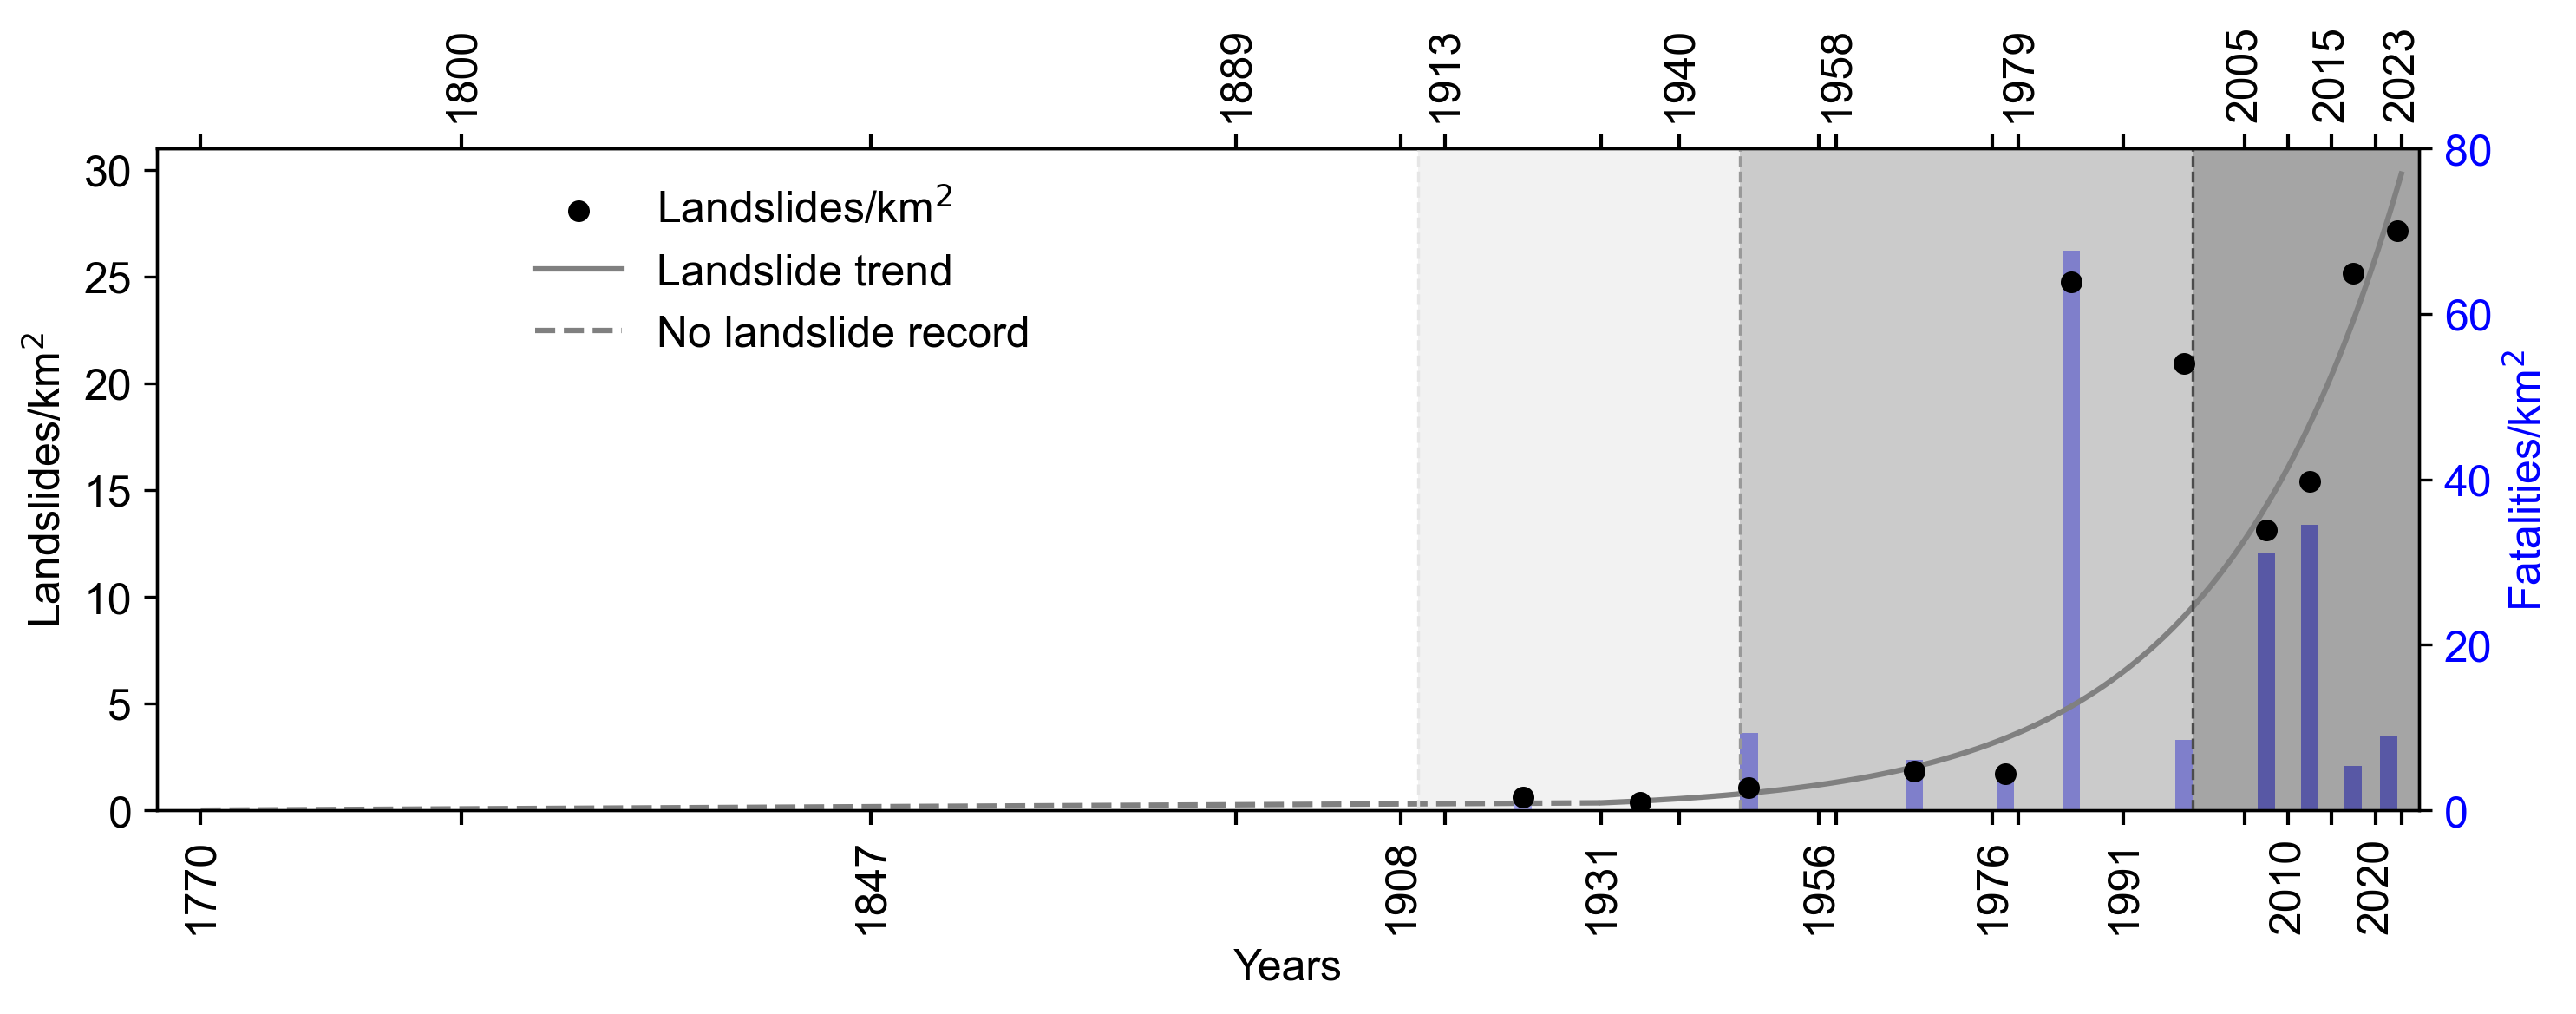

In [152]:
# POWER REGRESSION

mpl.rcParams['font.family'] = 'Arial'
fig, ax1 = plt.subplots(figsize=(10, 4), dpi=300)


# Filter out zero values
non_zero_mask = events_area > 0
filtered_years = years[non_zero_mask]
filtered_events_area = events_area[non_zero_mask]
years_mid_filtered = [1922, 1935.5, 1948, 1967, 1977.5, 1985, 1998, 2007.5, 2012.5, 2017.5, 2022.5]

#scatter plot
ax1.scatter(years_mid_filtered, filtered_events_area, color='k', s=25, label='Landslides/km$^2$', zorder=10)


#power regression smooth
coefficients = np.polyfit(np.log(filtered_years), np.log(filtered_events_area), 1)
smooth_years = np.linspace(min(filtered_years), max(filtered_years), num=1000)
smooth_power_regression = np.exp(np.polyval(coefficients, np.log(smooth_years)))
label=f'y = {np.exp(coefficients[1]):.2f}*x^{coefficients[0]:.2f}'
plt.plot(smooth_years, smooth_power_regression, label='Landslide trend', color='grey')

### Extension to no landslide record
x = [1770, smooth_years[0]]
y = [0, smooth_power_regression[0]]
plt.plot(x, y, linestyle = '--', color='grey', label='No landslide record')

plt.legend(loc='upper left', frameon=False, fontsize=12, bbox_to_anchor=(0.15,1))


years_y = [1770, 1800, 1847, 1889, 1908, 1913, 1931, 1940, 1956, 1976, 1979, 1991, 2005, 2010, 2015, 2020, 2023]
ax1.set_xlim(1765, 2025)
plt.ylim(0,31)
plt.yticks(np.arange(0, 31, 5), size=12)
plt.xticks(years_one, years_one, size=12, rotation=90)
ax1.set_xlabel('Years', size=12)
ax1.set_ylabel('Landslides/km$^2$', size=12)
ax1.set_xticks(years, minor=True) 
ax1.tick_params(axis='x', which='major', direction='out', length=4, width=1)
ax1.tick_params(axis='x', which='minor', direction='out', length=4, width=1, color='k')

# Add the second x-axis
secax = ax1.secondary_xaxis('top')  
secax.set_xticks(years_two)           
secax.set_xticks(years, minor=True) 
secax.set_xticklabels(years_two, rotation=90, size=12) 
secax.tick_params(axis='x', which='major', direction='out', length=4, width=1)
secax.tick_params(axis='x', which='minor', direction='out', length=4, width=1, color='k')

### SECOND PLOT
years_mid = [1750, 1785, 1823.5, 1868, 1898.5, 1910.5, 1922, 1935.5, 1948, 1957, 1967, 1977.5, 1985, 1998, 2007.5, 2012.5, 2017.5, 2021.5]

ax2 = ax1.twinx()
ax2.bar(years_mid, fatalities_area, width=2, color='b', alpha=0.6, zorder=1)  # Bar plot with different color
ax2.set_ylabel('Fatalities/km$^2$', size=12, color='b')
ax2.tick_params(axis='y', labelcolor='b')
plt.yticks(np.arange(0, 81, 20), size=12)
#ax2.set_xlim(1765, 2025)

## Years thresholds
year_cuts = [1910, 1947, 1999]
year_intervals = [37, 52, 55]
year_colors = cm.binary(np.linspace(0.1, 1, 4))
year_categories=['1910-1947: Plan Medellín Futuro', '1947-1970: Master Plan', '1970-present: POTs']
for i, (y_value, color, slope_cat) in enumerate(zip(year_cuts, year_colors, year_categories)):
    ax1.axvline(y_value, color=color, linestyle='--', linewidth=0.8)
    ax1.axvspan(y_value, y_value + year_intervals[i], facecolor=color, alpha=0.5, label=slope_cat)


ax1.set_zorder(2)
ax2.set_zorder(1)

# Ensure ax1 is drawn last
ax1.patch.set_visible(False)


plt.tight_layout()
plt.savefig('Fig03_b_FV.pdf', dpi=300)
plt.show()

In [57]:
smooth_years

1931.0

In [58]:
smooth_power_regression[0]

0.3466916105284805

In [59]:
smooth_power_regression[-1]

29.80630755040923